# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.045210e+01     6.561257e+00
 * time: 0.004136085510253906
     1     2.728247e+01     3.891898e+00
 * time: 0.012537956237792969
     2     2.013589e+01     5.633218e+00
 * time: 0.03269314765930176
     3     1.277056e+01     1.930491e+00
 * time: 0.05701398849487305
     4     1.160173e+01     2.645833e+00
 * time: 0.07322001457214355
     5     1.126027e+01     1.301441e+00
 * time: 0.08948993682861328
     6     1.039500e+01     1.146777e+00
 * time: 0.10560798645019531
     7     9.870690e+00     9.528918e-01
 * time: 0.12183904647827148
     8     9.541662e+00     6.253213e-01
 * time: 0.13797211647033691
     9     9.377753e+00     6.056077e-01
 * time: 0.15415096282958984
    10     9.258907e+00     6.264517e-01
 * time: 0.17035698890686035
    11     9.130028e+00     7.151177e-01
 * time: 0.1827099323272705
    12     8.995444e+00     5.639402e-01
 * time: 0.19528412818908691
    13     8.847151e+00     6.994983e-01
 * time

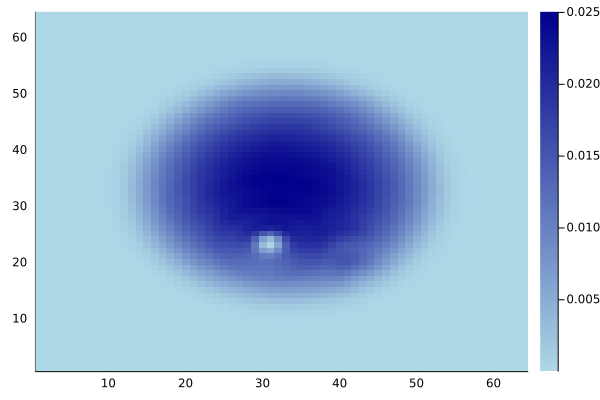

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)